# Swimming in Berlin

### I love swimming. One of my favourite things about this wonderful city I call home is the opportunity to swim outdoors in lots of places, all over the city. Plus the fact that the climate allows you to do so for long stretches in the summer (not the case in my native Scotland, I'm sad to report).

### I decided to take a look at which area of Berlin would be best to live in for someone who wanted to have as many possibilities for outdoor swimming as they could.

### First stop: daten.berlin.de

In [9]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import our list of official bathing spots - 'badestellen'
bad = pd.read_csv('badestellen.csv', sep=';')

#let's take a look at this DataFrame and see what we're dealing with...
display(bad.head())

,id,prognoselink,farbe,badestellelink,badname,bezirk,dat,cb,eco,ente,...,profillink,pdflink,rss_name,bsl,algen,wasserqualitaet,farb_id,wasserqualitaet_lageso,wasserqualitaet_predict,dat_predict
0,3,NaN,gruen.jpg,"""Alter Hof(Link zur Badestelle Alter Hof)"":/la...",Alter Hof,Steglitz-Zehlendorf,2019-09-03,360,<15,<15,...,"""Unterhavel - Alter Hof(Link zum Badegewässerp...","""Alle Probeentnamen der aktuellen Saison für d...",Alter Hof / Unterhavel,B334,NaN,1,1,1,NaN,NaN
1,6,NaN,gruen.jpg,"""Bammelecke(Link zur Badestelle Bammelecke)"":/...",Bammelecke,Treptow-Köpenick,2019-09-09,<300,<15,<15,...,"""Dahme - Bammelecke(Link zum Badegewässerprofi...","""Alle Probeentnamen der aktuellen Saison für d...",Bammelecke,B225,NaN,1,1,1,NaN,NaN
2,9,NaN,gruen.jpg,"""Breitehorn(Link zur Badestelle Breitehorn)"":/...",Breitehorn,Spandau,2019-09-16,360,423,<15,...,"""Unterhavel - Breitehorn(Link zum Badegewässer...","""Alle Probeentnamen der aktuellen Saison für d...",Breitehorn / Unterhavel,B332,NaN,1,1,1,NaN,NaN
3,12,NaN,gruen.jpg,"""Bürgerablage(Link zur Badestelle Bürgerablage...",Bürgerablage,Spandau,2019-09-04,360,30,<15,...,"""Oberhavel - Bürgerablage(Link zum Badegewässe...","""Alle Probeentnamen der aktuellen Saison für d...",Bürgerablage / Oberhavel,B304,NaN,1,1,1,NaN,NaN
4,15,NaN,gruen.jpg,"""Dämeritzsee(Link zur Badestelle Dämeritzsee)""...",Dämeritzsee,Treptow-Köpenick,2019-09-09,<300,<15,<15,...,"""Großer Müggelsee - Dämeritzsee(Link zum Badeg...","""Alle Probeentnamen der aktuellen Saison für d...",Dämeritzsee,B105,NaN,1,1,1,NaN,NaN


In [10]:
# How many rows and columns are we dealing with?
bad.shape

(39, 23)

In [11]:
bad.sort_values(by='bezirk', inplace=True)
display(bad)

,id,prognoselink,farbe,badestellelink,badname,bezirk,dat,cb,eco,ente,...,profillink,pdflink,rss_name,bsl,algen,wasserqualitaet,farb_id,wasserqualitaet_lageso,wasserqualitaet_predict,dat_predict
35,108,NaN,gruen.jpg,"""Teufelssee(Link zur Badestelle Teufelsseee)"":...",Teufelssee,Charlottenburg-Wilmersdorf,2019-09-06,<300,<15,<15,...,"""Teufelssee - Teufelssee(Link zum Badegewässer...","""Alle Probeentnamen der aktuellen Saison für d...",Teufelssee,B936,NaN,1,1,1,NaN,NaN
16,51,NaN,gruen.jpg,"""Freibad Jungfernheide(Link zur Badestelle Fre...","Jungfernheide, Freibad",Charlottenburg-Wilmersdorf,2019-09-05,910,77,15,...,"""Jungfernheideteich - Freibad Jungfernheide(Li...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Jungfernheide,B922,NaN,1,1,1,NaN,NaN
14,45,NaN,gruen.jpg,"""Halensee(Link zur Badestelle Halensee)"":/lage...",Halensee,Charlottenburg-Wilmersdorf,2019-08-22,<300,<15,<15,...,"""Halensee - Halensee(Link zum Badegewässerprof...","""Alle Probeentnamen der aktuellen Saison für d...",Halensee,B930,NaN,1,1,1,NaN,NaN
13,42,NaN,gruen_prog.jpg,"""Grunewaldturm(Link zur Badestelle Grunewaldtu...",Grunewaldturm,Charlottenburg-Wilmersdorf,2019-09-16,360,<15,<15,...,"""Unterhavel - Grunewaldturm(Link zum Badegewäs...","""Alle Probeentnamen der aktuellen Saison für d...",Grunewaldturm / Unterhavel,B330,NaN,11,1,1,ausgezeichnet,2019-10-27
23,72,NaN,gruen.jpg,"""Strandbad Orankesee(Link zur Badestelle Orank...","Orankesee, Strandbad",Lichtenberg,2019-09-05,<300,<15,15,...,"""Orankesee - Strandbad Orankesee(Link zum Bade...","""Alle Probeentnamen der aktuellen Saison für d...",Strandbad Orankesee,B911,NaN,1,1,1,NaN,NaN
24,75,NaN,gruen.jpg,"""Freibad Plötzensee(Link zur Badestelle Freiba...","Plötzensee, Freibad",Mitte,2019-09-05,<300,<15,127,...,"""Plötzensee - Freibad Plötzensee(Link zum Bade...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Plötzensee,B915,NaN,1,1,1,NaN,NaN
37,114,NaN,gruen.jpg,"""Seebadeanstalt Weißensee(Link zur Badestelle ...","Weißensee, Seebadeanstalt",Pankow,2019-09-05,<300,15,<15,...,"""Weißer See - Seebadeanstalt Weißensee(Link zu...","""Alle Probeentnamen der aktuellen Saison für d...",Seebadeanstalt Weißensee,B910,NaN,1,1,1,NaN,NaN
21,66,NaN,gruen.jpg,"""Freibad Lübars Ziegeleisee(Link zur Badestell...","Lübars, Freibad (Ziegeleisee)",Reinickendorf,2019-09-05,<300,<15,<15,...,"""Ziegeleisee - Freibad Lübars Ziegeleisee (Lin...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Lübars (Ziegeleisee),B926,NaN,1,1,1,NaN,NaN
26,81,NaN,gruen.jpg,"""Sandhauser Straße(Link zur Badestelle Sandhau...",Sandhauser Straße,Reinickendorf,2019-09-04,<300,<15,15,...,"""Oberhavel - Sandhauser Straße(Link zum Badege...","""Alle Probeentnamen der aktuellen Saison für d...",Sandhauser Straße / Oberhavel,B302,NaN,1,1,1,NaN,NaN
15,48,NaN,gruen.jpg,"""Freibad Heiligensee(Link zur Badestelle Freib...","Heiligensee, Freibad",Reinickendorf,2019-09-05,<300,<15,<15,...,"""Heiligensee - Freibad Heiligensee(Link zum Ba...","""Alle Probeentnamen der aktuellen Saison für d...",Freibad Heiligensee,B925,NaN,1,1,1,NaN,NaN


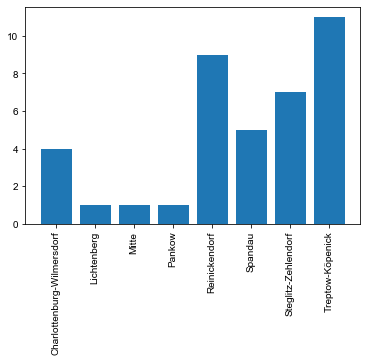

In [12]:
# Plot a histogram - rwidth=0.8 means there are gaps between the bars, which I find easier to read.
# The code for bins centres the bars on the ticks on the x-axis, instead of having them left- or right-aligned.
plt.hist(bad['bezirk'], rwidth=0.8, bins=np.arange(9)-0.5)

# Another couple of tweaks to make the plot more attractive - rotate the xticks so they display vertically, and use
# seaborn style because it's simple and pretty.
plt.xticks(rotation=90)
plt.style.use('seaborn')

plt.show()

In [13]:
# This next part isn't strictly necessary for this analysis, but can be handy for larger datasets, so I left it in.
# All of Berlin's 12 districts (Bezirke) are not represented in our list of bathing spots. 
# We can create a list of districts with bathing spots (bezirke_mit_badestellen) using the .unique() method. 
# In our case there are only 8 so we could have just read them off, but it's good to make our code scalable where possible!
bezirke_mit_badestellen = list(bad['bezirk'].unique())

display(bezirke_mit_badestellen)

['Charlottenburg-Wilmersdorf',
 'Lichtenberg',
 'Mitte',
 'Pankow',
 'Reinickendorf',
 'Spandau',
 'Steglitz-Zehlendorf',
 'Treptow-Köpenick']

In [14]:
# OK, great, so our histogram shows us basically the information we're looking for. Now to get those values into a DataFrame.

# We can do that in one line of code like this:
stellen_pro_bezirk = pd.DataFrame({'Number_of_Badestellen': bad['bezirk'].groupby(bad['bezirk']).count()}, columns=['Number_of_Badestellen'])

# That's pretty intense though, what's going on? Well, we're making a dictionary with the column names 
# (in our case, column name) plus the data for that column, then feeding it to pandas pd.DataFrame function to 
# create a DataFrame. We want the number of entries in the DataFrame 'bad' for 
# each district (bezirk), so we simply select the column bad['bezirk'], then group it by the relevant factor (in our
# case, the district) and apply the .count() method to obtain the count. Then that is wrapped inside pandas 
# pd.DataFrame function to create a DataFrame showing exactly the information we want.

# I initially did this in the two lines below, creating the dictionary first and then creating a DataFrame from that, 
# but I felt the one-line solution was more elegant.
# stellen_pro_bezirk_dict = {'Number_of_Badestellen': bad['bezirk'].groupby(bad['bezirk']).count()}
# stellen_pro_bezirk_df = pd.DataFrame(stellen_pro_bezirk_dict, columns=['Number_of_Badestellen'])

display(stellen_pro_bezirk)

,Number_of_Badestellen
bezirk,
Charlottenburg-Wilmersdorf,4
Lichtenberg,1
Mitte,1
Pankow,1
Reinickendorf,9
Spandau,5
Steglitz-Zehlendorf,7
Treptow-Köpenick,11


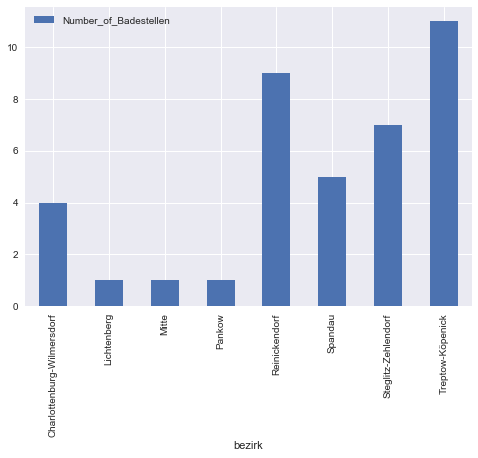

In [21]:
# Let's check that gives us the same graph as before

stellen_pro_bezirk.plot(kind='bar')

# Lovely stuff

### Now we have the absolute number of bathing spots for each district. But the districts are not evenly sized or populated. It would be useful to know how many bathing spots there are per inhabitant. 

### Well don't worry - we can manage that! Let's start with population.

In [8]:
# Let's get the number of inhabitants for the city - sourced from https://daten.berlin.de/datensaetze/einwohnerinnen-und-einwohner-berlin-lor-planungsr%C3%A4umen-am-31122018

# Reading this into a DataFrame
einwohner = pd.read_csv('EWR201812E_Matrix.csv', sep=';')
display(einwohner.head(10
                      ))

,ZEIT,RAUMID,BEZ,PGR,BZR,PLR,STADTRAUM,E_E,E_EM,E_EW,...,E_E95_110,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,E_E65U80,E_E80U110
0,201812,1011101,1,1,11,1,1,3384,1751,1633,...,6,27,151,120,38,322,1616,383,542,185
1,201812,1011102,1,1,11,2,1,196,127,69,...,0,0,3,3,3,12,115,38,22,0
2,201812,1011103,1,1,11,3,1,5038,2698,2340,...,21,48,195,325,109,412,2281,742,694,232
3,201812,1011104,1,1,11,4,1,4759,2626,2133,...,7,38,223,394,143,578,2563,457,281,82
4,201812,1011105,1,1,11,5,1,1421,771,650,...,0,16,67,87,15,90,743,180,184,39
5,201812,1011201,1,1,12,1,1,2405,1267,1138,...,0,17,102,149,59,204,1129,364,291,90
6,201812,1011202,1,1,12,2,1,632,346,286,...,0,3,24,27,24,27,337,90,81,19
7,201812,1011203,1,1,12,3,1,1115,594,521,...,0,9,50,53,12,64,619,139,127,42
8,201812,1011204,1,1,12,4,1,8279,4211,4068,...,6,100,378,411,105,496,4198,959,1219,413
9,201812,1011301,1,1,13,1,1,6919,3587,3332,...,3,80,384,403,85,395,4314,607,540,111


In [7]:
# Let's take a look at this DataFrame to get an idea of what we're dealing with

display(einwohner.shape)

display(einwohner['E_E'].max())
display(einwohner['E_E'].min())
display(einwohner['E_E'].sum())

# So we can see we have 447 rows of data with 51 columns. Each row represents an administrative area in Berlin.
# The maximum value in column 'E_E' (the number of people who live in that area) is 36,487, the minimum is 12 - 
# That's quite a range!

(447, 51)

36487

12

3748148

In [18]:
# There's lots of cool data here, but we only want Columns 'BEZ' (Bezirk (District)) and 'E_E' (Einwohner insgesamt 
# (Total inhabitants)) here (column indexes 2 and 7).

# Let's slice our dataframe using .iloc()
einwohner_edited = einwohner.iloc[:,[2,7]]

display(einwohner_edited.head())

,BEZ,E_E
0,1,3384
1,1,196
2,1,5038
3,1,4759
4,1,1421


In [19]:
# This data is still super-granular - we want the total inhabitants figure for each district.
# We can do that by using .groupby() on the 'BEZ' column, and using the .sum() aggregator function to add together 
# the values for each district

einwohner_sum = einwohner_edited.groupby('BEZ').sum()
display(einwohner_sum)

,E_E
BEZ,
1,383457
2,289120
3,407039
4,341327
5,243080
6,308077
7,351429
8,330786
9,269775


In [20]:
# Nice! Now we have the population value of each District in Berlin (as of December 2018), but they're listed as numbers
# and our stellen_pro_bezirk DataFrame has them listed by name, which is much more sensible.

# It turns out the administration of Berlin use number codes for each district so it would be useful to have a list of
# those, in the correct order. Using the info sourced from https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins
# I created just such a list!

bezirke = ['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow', 'Charlottensburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf', 'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick', 'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf']

# Let's add this list as a new column to our DataFrame, and rename the 'E_E' column to something more meaningful while
# we're at it
einwohner_sum['Bezirk'] = bezirke
einwohner_sum.columns = ['Population', 'Bezirk']
display(einwohner_sum)

,Population,Bezirk
BEZ,,
1,383457,Mitte
2,289120,Friedrichshain-Kreuzberg
3,407039,Pankow
4,341327,Charlottensburg-Wilmersdorf
5,243080,Spandau
6,308077,Steglitz-Zehlendorf
7,351429,Tempelhof-Schöneberg
8,330786,Neukölln
9,269775,Treptow-Köpenick


In [21]:
# Now we're talking! The next step is to merge the two DataFrames together using pd.merge() 
pop_and_badestellen = pd.merge(stellen_pro_bezirk, einwohner_sum, left_on='bezirk', right_on='Bezirk')

display(pop_and_badestellen)

,Number_of_Badestellen,Population,Bezirk
0,1,290493,Lichtenberg
1,1,383457,Mitte
2,1,407039,Pankow
3,9,264826,Reinickendorf
4,5,243080,Spandau
5,7,308077,Steglitz-Zehlendorf
6,11,269775,Treptow-Köpenick


In [22]:
# Let's use some very simple maths to create a column with the number of bathing spots per inhabitant
pop_and_badestellen['badestellen_pro_einwohner'] = pop_and_badestellen['Number_of_Badestellen'] / pop_and_badestellen['Population']

display(pop_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,badestellen_pro_einwohner
0,1,290493,Lichtenberg,0.000003
1,1,383457,Mitte,0.000003
2,1,407039,Pankow,0.000002
3,9,264826,Reinickendorf,0.000034
4,5,243080,Spandau,0.000021
5,7,308077,Steglitz-Zehlendorf,0.000023
6,11,269775,Treptow-Köpenick,0.000041


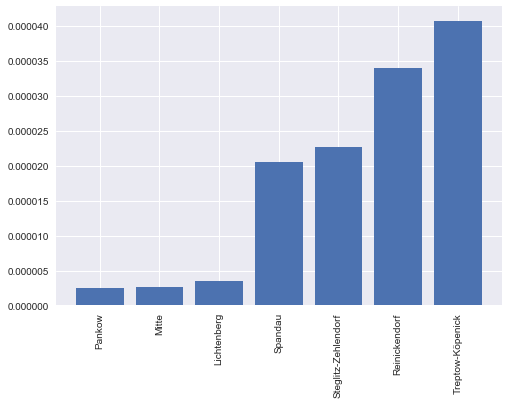

In [23]:
# And voila! Now we can create a bar chart to see which district has the most bathing spots once we control for population

# sorting the DataFrame purely for aesthetic reasons
pop_and_badestellen.sort_values(by='badestellen_pro_einwohner', inplace=True)

# using Matplotlib's plt.bar() function to create a nice chart. This will still use the seaborn style we 
# applied earlier, as those sheets apply to the whole notebook - worth playing with to find your favourite.
plt.bar(data=pop_and_badestellen, x='Bezirk', height='badestellen_pro_einwohner')
plt.xticks(rotation=90)

plt.show()

# Great! 
## Let's take a look at how area impacts these results

In [25]:
# We can source the area (Fläche, in German) information from a number of places - the easiest being https://de.wikipedia.org/wiki/Berlin

# Let's make that into a list, ordered by the standard order for the districts of Berlin
area = [39.47, 20.34, 103.07, 64.72, 91.87, 102.56, 53.10, 44.93, 168.42, 61.78, 52.12, 89.31]

# Now we can make a copy of einwohner_sum from earlier, and add this list as a column
einwohner_area = einwohner_sum
einwohner_area['Fläche'] = area


display(einwohner_area)


,Population,Bezirk,Fläche
BEZ,,,
1,383457,Mitte,39.47
2,289120,Friedrichshain-Kreuzberg,20.34
3,407039,Pankow,103.07
4,341327,Charlottensburg-Wilmersdorf,64.72
5,243080,Spandau,91.87
6,308077,Steglitz-Zehlendorf,102.56
7,351429,Tempelhof-Schöneberg,53.10
8,330786,Neukölln,44.93
9,269775,Treptow-Köpenick,168.42


In [26]:
# Now we do something very similar to before
area_and_badestellen = pd.merge(stellen_pro_bezirk, einwohner_area, left_on='bezirk', right_on='Bezirk')

display(area_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,Fläche
0,1,290493,Lichtenberg,52.12
1,1,383457,Mitte,39.47
2,1,407039,Pankow,103.07
3,9,264826,Reinickendorf,89.31
4,5,243080,Spandau,91.87
5,7,308077,Steglitz-Zehlendorf,102.56
6,11,269775,Treptow-Köpenick,168.42


In [27]:
# Let's use some very simple maths to create a column with the number of bathing spots per km**2
area_and_badestellen['badestellen_pro_km2'] = area_and_badestellen['Number_of_Badestellen'] / area_and_badestellen['Fläche']

display(area_and_badestellen)

,Number_of_Badestellen,Population,Bezirk,Fläche,badestellen_pro_km2
0,1,290493,Lichtenberg,52.12,0.019186
1,1,383457,Mitte,39.47,0.025336
2,1,407039,Pankow,103.07,0.009702
3,9,264826,Reinickendorf,89.31,0.100773
4,5,243080,Spandau,91.87,0.054425
5,7,308077,Steglitz-Zehlendorf,102.56,0.068253
6,11,269775,Treptow-Köpenick,168.42,0.065313


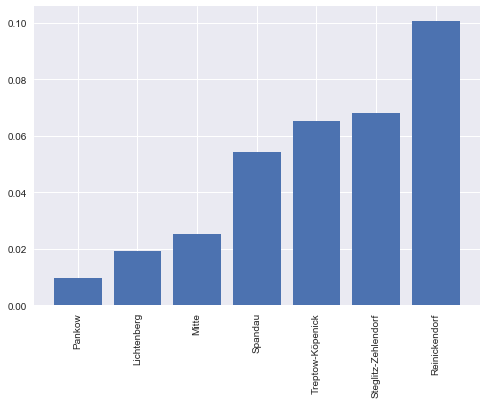

In [28]:
# And voila! Now we can create a bar chart to see which district has the most bathing spots once we control for area.

# sorting the DataFrame purely for aesthetic reasons
area_and_badestellen.sort_values(by='badestellen_pro_km2', inplace=True)

# using Matplotlib's plt.bar() function to create a nice chart. This will still use the seaborn style we 
# applied earlier, as those sheets apply to the whole notebook - worth playing with to find your favourite.
plt.bar(data=area_and_badestellen, x='Bezirk', height='badestellen_pro_km2')
plt.xticks(rotation=90)

plt.show()

# Interesting!
### So while Treptow-Köpenick has the largest absolute number of bathing spots, and the largest ratio of bathing spots-to-inhabitants, when we consider area it falls down to third place, behind Steglitz-Zehlendorf and the clear winner, Reinickendorf.